In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [3]:
# read in data file
readcsv = pd.read_csv("Data.csv")
readcsv.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [4]:
sandbox = readcsv.copy()

In [5]:
# filter out rows with no listing price
sandbox.drop(sandbox[sandbox["Listing Price"] == 0].index, inplace = True)

In [6]:
# filter out rows with no reviews
sandbox.drop(sandbox[sandbox["Reviews"] == 0].index, inplace = True)
len(sandbox)

2752

In [7]:
# filter out rows with no ratings
sandbox.drop(sandbox[sandbox["Rating"] == 0].index, inplace = True)
len(sandbox)

2680

In [8]:
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [9]:
#add columns for Adidas/Nike distinction and gender market
sandbox['True_Brand']= ""
sandbox['Gender'] = ""
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,,


In [10]:
#finding array of unique brands (justifying our Nike or Adidas logic)
sandbox["Brand"].unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [11]:
#loop through rows to create binary Nike/ Adidas column
# for index, row in sandbox.iterrows():
#     try:
        
        
for index, row in sandbox.iterrows():
    Brand_Name = row["Brand"]
    
    if Brand_Name == 'Nike':
        sandbox.loc[[index], "True_Brand"]= "Nike"
    else:
        sandbox.loc[[index], "True_Brand"]= "Adidas"
sandbox

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,
...,...,...,...,...,...,...,...,...,...,...,...,...
3248,Nike Zoom Pegasus Turbo XX,AR4347-600,16995,13597,0,Nike,"Bridging performance and style, the Nike Zoom ...",1.0,1,2020-04-13T15:38:54,Nike,
3255,Nike Zoom Pegasus Turbo 2 Special Edition,BV7757-500,15995,12797,0,Nike,The Nike Zoom Pegasus Turbo 2 is updated with ...,5.0,1,2020-04-13T15:39:05,Nike,
3261,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,"In spiritual circles, the colour purple repres...",4.4,10,2020-04-13T15:40:56,Nike,
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01,Nike,


In [12]:
#Do the same thing for gender
# sandbox.loc[[index], "True_Brand"]= "Nike"

for index, row in sandbox.iterrows():
    #sandbox['Product_Name'] = row["Product_Name"]
    if row["Product Name"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Product Name"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Product Name"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      

    elif row["Description"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Description"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Description"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      
    else:
        sandbox.loc[index, "Gender"]= "Unknown"
sandbox["Gender"].unique()

array(['Women', 'Men', 'Unisex', 'Unknown'], dtype=object)

In [13]:
# Average Adidas shoe rating
adi_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng = adi_rtng_df["Rating"].mean()
adi_rtng

3.4637227722772277

In [14]:
# Average Nike shoe rating
nike_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng = nike_rtng_df["Rating"].mean()
nike_rtng

4.12774193548387

In [15]:
# Adidas men's average shoe rating 
adi_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
adi_rtng_man_df = adi_rtng_man_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng_man = adi_rtng_man_df["Rating"].mean()
adi_rtng_man

3.459486873508353

In [16]:
# Adidas women's average shoe rating 
adi_rtg_women_df = sandbox.loc[sandbox["Gender"] == "Women"]
adi_rtg_women_df = adi_rtg_women_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_women = adi_rtg_women_df["Rating"].mean()
adi_rtg_women

3.4745672436751

In [17]:
# Adidas unisex average shoe rating 
adi_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
adi_rtg_uni_df = adi_rtg_uni_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_uni = adi_rtg_uni_df["Rating"].mean()
adi_rtg_uni

3.4731958762886603

In [18]:
# Adidas unknown gender average shoe rating (adidas has one shoe in this category)
adi_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
adi_rtg_unkn_df = adi_rtg_unkn_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_unkn = adi_rtg_unkn_df["Rating"].mean()
adi_rtg_unkn

1.5

In [19]:
# Nike men's average shoe rating 
nike_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
nike_rtng_man_df = nike_rtng_man_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_man = nike_rtng_man_df["Rating"].mean()
nike_rtng_man

4.141935483870968

In [20]:
# Nike women's average shoe rating 
nike_rtng_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
nike_rtng_woman_df = nike_rtng_woman_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_woman = nike_rtng_woman_df["Rating"].mean()
nike_rtng_woman

3.766666666666667

In [21]:
# Nike unisex average shoe rating 
nike_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
nike_rtg_uni_df = nike_rtg_uni_df.loc[sandbox["True_Brand"] == "Nike"]
# nike_rtg_uni_df
nike_rtg_uni = nike_rtg_uni_df["Rating"].mean()
nike_rtg_uni

nan

In [22]:
# Nike unknown gender average shoe rating (adidas has one shoe in this category)
nike_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
nike_rtg_unkn_df = nike_rtg_unkn_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_unkn = nike_rtg_unkn_df["Rating"].mean()
nike_rtg_unkn

4.1625000000000005

In [25]:
# Average number of reviews Adidas
adi_revw_df = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw = adi_revw_df["Reviews"].mean()
adi_revw

49.283168316831684

In [28]:
# Average number of reviews Nike
nike_revw_df = sandbox.loc[sandbox["True_Brand"] == "Nike"]
nike_revw = nike_revw_df["Reviews"].mean()
nike_revw

9.154838709677419

In [30]:
# Adidas men's average review count 
adi_revw_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
adi_revw_man_df = adi_revw_man_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_man = adi_revw_man_df["Reviews"].mean()
adi_revw_man

49.11575178997613

In [31]:
# Adidas women's average review count 
adi_revw_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
adi_revw_woman_df = adi_revw_woman_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_woman = adi_revw_woman_df["Reviews"].mean()
adi_revw_woman

49.76964047936085

In [34]:
# Adidas unisex average review count 
adi_revw_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
adi_revw_uni_df = adi_revw_uni_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_uni = adi_revw_uni_df["Reviews"].mean()
adi_revw_uni

48.72164948453608

In [35]:
# Adidas unkown average review count 
adi_revw_unk_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
adi_revw_unk_df = adi_revw_unk_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_unk = adi_revw_unk_df["Reviews"].mean()
adi_revw_unk

19.0

In [36]:
# Nike men's average review count 
nike_revw_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
nike_revw_man_df = nike_revw_man_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_man = nike_revw_man_df["Reviews"].mean()
nike_revw_man

9.451612903225806

In [37]:
# Nike women's average review count 
nike_revw_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
nike_revw_woman_df = nike_revw_woman_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_woman = nike_revw_woman_df["Reviews"].mean()
nike_revw_woman

12.166666666666666

In [38]:
# Nike unisex average review count 
nike_revw_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
nike_revw_uni_df = nike_revw_uni_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_uni = nike_revw_uni_df["Reviews"].mean()
nike_revw_uni

nan

In [39]:
# Nike unknown average review count 
nike_revw_unk_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
nike_revw_unk_df = nike_revw_unk_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_unk = nike_revw_unk_df["Reviews"].mean()
nike_revw_unk

8.75

Text(0.5, 1.0, 'Adidas vs. Nike: avg product rating by gender')

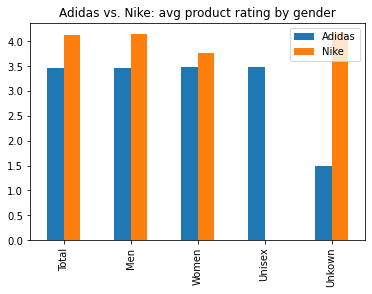

In [40]:
# Plot Ratings Nike vs. Adidas by gender
ratingsplotdata = pd.DataFrame(
    {"Adidas": [adi_rtng, adi_rtng_man, adi_rtg_women, adi_rtg_uni, adi_rtg_unkn],
    "Nike": [nike_rtng, nike_rtng_man, nike_rtng_woman, nike_rtg_uni, nike_rtg_unkn]}, 
    index=["Total", "Men", "Women", "Unisex", "Unkown"])
# Plot a bar chart
ratingsplotdata.plot(kind="bar")
plt.title("Adidas vs. Nike: avg product rating by gender")

Text(0.5, 1.0, 'Adidas vs. Nike: avg product review count by gender')

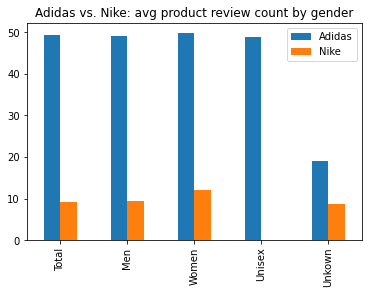

In [75]:
# Plot Reviews Nike vs. Adidas by gender
ratingsplotdata = pd.DataFrame(
    {"Adidas": [adi_revw, adi_revw_man, adi_revw_woman, adi_revw_uni, adi_revw_unk],
    "Nike": [nike_revw, nike_revw_man, nike_revw_woman, nike_revw_uni, nike_revw_unk]}, 
    index=["Total", "Men", "Women", "Unisex", "Unkown"])
# Plot a bar chart
ratingsplotdata.plot(kind="bar")
plt.title("Adidas vs. Nike: avg product review count by gender")

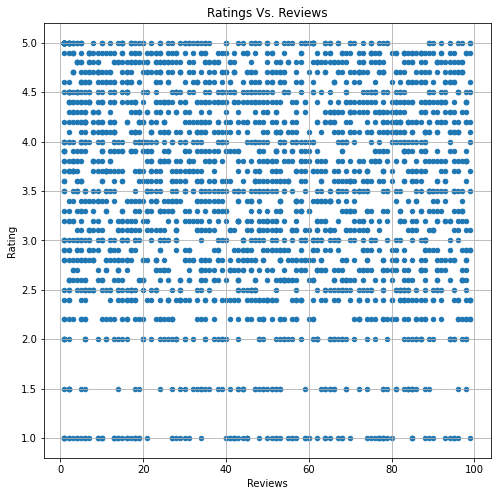

In [50]:
# Create scatter plot for reviews vs rating
sandbox.plot(kind="scatter", x="Reviews", y="Rating", grid=True, figsize=(8,8),
              title="Ratings Vs. Reviews")
plt.show()

In [73]:
# Correlation between avg rating and avg review (Adidas)
adidas_ratings = nike_rtng_df.iloc[:,7]
adidas_reviews = nike_rtng_df.iloc[:,8]
correlation = st.pearsonr(adidas_ratings,adidas_reviews)
print(f"The correlation between both factors is {round(correlation[0],2)}")
adidas_ratings

The correlation between both factors is -0.03


2646    4.2
2694    5.0
2700    3.9
2701    3.7
2712    3.9
       ... 
3248    1.0
3255    5.0
3261    4.4
3263    5.0
3265    5.0
Name: Rating, Length: 155, dtype: float64

In [74]:
correlation

(-0.031182392818260844, 0.7001122931787639)

In [41]:
# use REGEX to find Women's product 
# sandbox.loc[sandbox["Product Name"].str.contains("women", case=False),:]